HEART FAILURE FINAL

In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#import missingno as msno
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import KFold, train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

from sklearn.tree import DecisionTreeClassifier
#import plotly.express as ex
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data

In [4]:
data = pd.read_csv('heart_failure.csv')
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


EXPLORATORY ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.shape

(299, 13)

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
data[data['platelets']==263358.03].shape

(25, 13)

In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

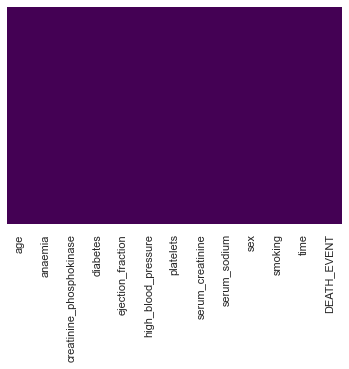

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df = data.copy()

In [12]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<AxesSubplot:>

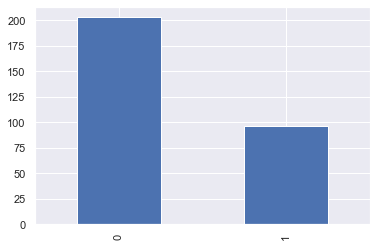

In [13]:
value_count = df['DEATH_EVENT'].value_counts()
value_count.plot.bar()

In [14]:
value_count

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [15]:
X = df.drop(["DEATH_EVENT"],axis=1)
y = df['DEATH_EVENT']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.columns =['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,61.136882,0,578,0,21,0,166000.000000,0.940321,134,1,0,34,1
402,74.268925,0,550,0,32,0,263358.030000,1.805875,134,0,0,22,1
403,64.682350,0,145,0,20,0,161809.410024,1.297882,129,0,1,7,1
404,70.116472,0,554,1,35,0,227893.669312,3.367087,134,1,0,30,1


<AxesSubplot:>

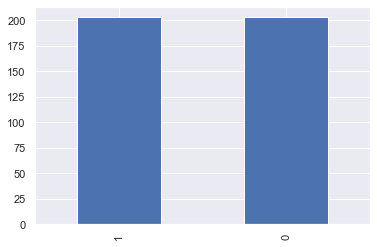

In [16]:
value_count = df['DEATH_EVENT'].value_counts()
value_count.plot.bar()

In [17]:
value_count

1    203
0    203
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

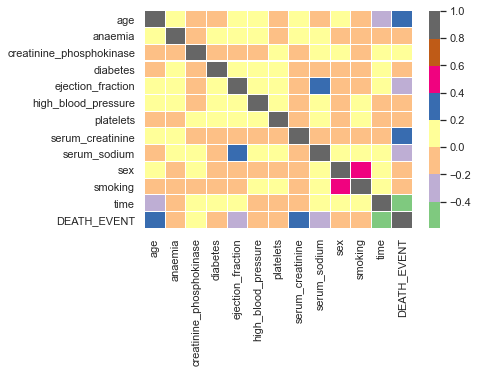

In [18]:
# correlation plot
sns.heatmap(df.corr(), annot=False
            , linewidths = 0.1,cmap = 'Accent')

In [19]:
df.age = df.age.astype('int64')
df.anaemia=pd.Categorical(df.anaemia)
df.diabetes=pd.Categorical(df.diabetes)
df.high_blood_pressure=pd.Categorical(df.high_blood_pressure)
df.sex=pd.Categorical(df.sex)
df.smoking=pd.Categorical(df.smoking)
df.DEATH_EVENT=pd.Categorical(df.DEATH_EVENT)

In [20]:
""" what age group is likely to die of heart failure?
what is the visual relationship between heart failure and ejection fraction and serum creatininine
explore sex and smoking
which sex smokes more

"""

' what age group is likely to die of heart failure?\nwhat is the visual relationship between heart failure and ejection fraction and serum creatininine\nexplore sex and smoking\nwhich sex smokes more\n\n'

In [21]:
"what age group is likely to die of heart failure?"
age_group= data.groupby(data['DEATH_EVENT']).mean()
age_group['age']

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

' https://www.emoryhealthcare.org/heart-vascular/wellness/heart-failure-statistics.html#:~:text=Heart%20Failure%20Statistics.%20Congestive%20heart%20failure%20affects%20people,of%20persons%20age%2060%20to%2069%20have%20CHF. '

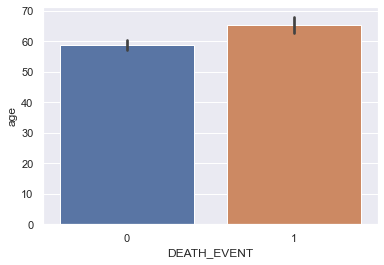

In [22]:
sns.barplot(x = data['DEATH_EVENT'], y = data['age'],data=age_group)

""" https://www.emoryhealthcare.org/heart-vascular/wellness/heart-failure-statistics.html#:~:text=Heart%20Failure%20Statistics.%20Congestive%20heart%20failure%20affects%20people,of%20persons%20age%2060%20to%2069%20have%20CHF. """

<AxesSubplot:>

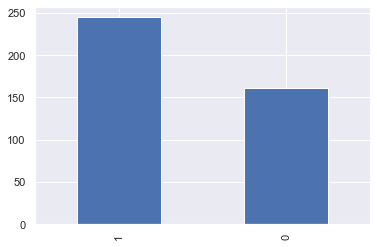

In [23]:
smoking_sex = df.iloc[:,[9,10]]
smoking_sex = smoking_sex['sex'].value_counts()
smoking_sex.plot.bar()                             # which sex smokes more

In [24]:
smoking_sex

1    245
0    161
Name: sex, dtype: int64

smoking and survived

In [25]:
smoking_surv = df.iloc[:,[10,12]]
smoking_surv.value_counts()

smoking  DEATH_EVENT
0        1              162
         0              137
1        0               66
         1               41
dtype: int64

<AxesSubplot:>

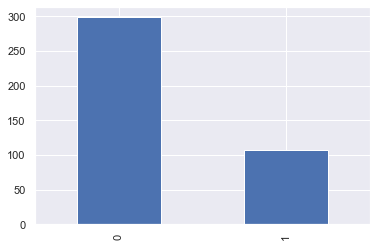

In [26]:
smoking_surv['smoking'].value_counts().plot.bar()    # count of patients that smokes

In [27]:
# comparing sex smoking and death events

sms = df.iloc[:,[9,10,12]]

In [28]:
sms.groupby('sex')

<AxesSubplot:xlabel='sex,smoking,DEATH_EVENT'>

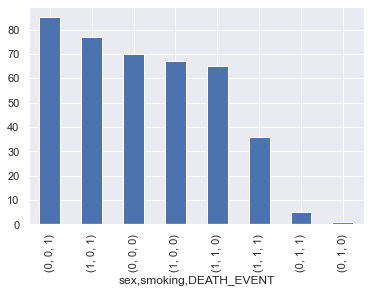

In [29]:
sms.value_counts().plot.bar()

<AxesSubplot:xlabel='DEATH_EVENT'>

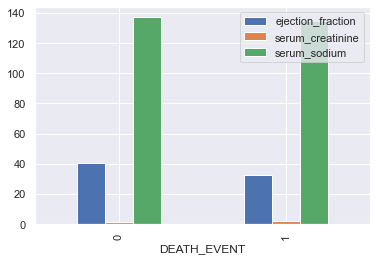

In [30]:
D = df.iloc[:,[4,7,8,12]]
D=D.groupby(D['DEATH_EVENT']).mean()
D.plot.bar()


In [31]:
D

,ejection_fraction,serum_creatinine,serum_sodium
DEATH_EVENT,,,
0,40.266010,1.184877,137.216749
1,32.719212,1.816141,134.881773


Model selection using Cross validation

In [32]:
x = df.iloc[:,0:11]
y = df['DEATH_EVENT']

In [63]:
knn= KNeighborsClassifier(n_neighbors= 1)
lr_model = LogisticRegression(random_state=5)
rf = RandomForestClassifier(random_state=5)
tree = DecisionTreeClassifier(random_state=5)
nb=GaussianNB()

In [64]:
models = [knn, lr_model, rf, tree, nb]
accuracy = []

In [65]:
for model in models:
    scores = cross_val_score(model, x, y, cv = 10, scoring = 'f1').mean()
    accuracy.append(scores)
print(accuracy)

[0.6566935352129729, 0.6850241931388329, 0.7828588150515575, 0.7529356471601619, 0.6464844651673296]


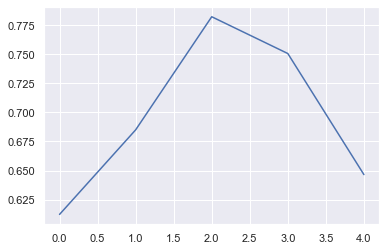

In [36]:
plt.plot(accuracy)

Parameter tuning using cross validation and gridsearch

In [37]:
rf_params={"random_state":np.arange(0,50)}
knn=RandomForestClassifier()
knn_cv=GridSearchCV(knn,rf_params,cv=10, scoring = 'f1').fit(x,y)
knn_cv.best_params_

{'random_state': 16}

In [48]:
rf_tuning = list(range(0, 50))
rf_accuracy = []
for par in rf_tuning:
    rf = RandomForestClassifier(random_state=par)
    scores = cross_val_score(rf, x, y, cv=10, scoring='f1').mean()
    rf_accuracy.append(scores)
print(rf_accuracy)

[0.7773660526965389, 0.7927571700870802, 0.792414105138826, 0.7798828171261524, 0.7970222325100373, 0.7828588150515575, 0.7875852317315731, 0.7919254948266036, 0.7806488247960004, 0.7723012854224691, 0.7904320748294923, 0.7895410033932272, 0.7951898423271979, 0.7877702278184412, 0.8040840734182254, 0.7852489872130437, 0.8144989783304364, 0.7923351719679749, 0.7912385941964095, 0.7939563733352729, 0.7835170412520547, 0.7896576376922378, 0.8016679434271546, 0.78152237578425, 0.8005875988157193, 0.8025883916297982, 0.7945550618721351, 0.7881390958248587, 0.7900888677717945, 0.8112354085694982, 0.7957061826432218, 0.8065584453046537, 0.8062509933370009, 0.787407695117133, 0.7903042855481879, 0.7886859174664054, 0.7959586518605237, 0.7947019508145263, 0.7843779199431242, 0.7974441891855392, 0.801705377655267, 0.7818580304677308, 0.7825121240237519, 0.7928512676003583, 0.7874707450487372, 0.8009706107607413, 0.7954305778540786, 0.7948542026449004, 0.7783277609103804, 0.7982644587633614]


Text(0, 0.5, 'Cross-Val_Accuracy')

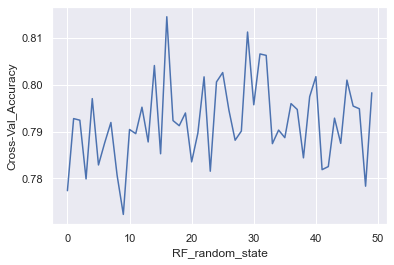

In [50]:
# plot the value of random state for rf against the cross-validated accuracy
plt.plot(rf_tuning, rf_accuracy)
plt.xlabel('RF_random_state')
plt.ylabel('Cross-Val_Accuracy')

In [39]:
rf = RandomForestClassifier(random_state=16)

In [40]:
scores = cross_val_score(rf, x, y, cv = 10, scoring = 'f1')
scores.mean()

0.8144989783304364

splitting the data into training and test data

In [41]:
x = df.iloc[:,0:11]
y = df['DEATH_EVENT']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

In [71]:
rf = RandomForestClassifier(random_state=16)

In [72]:
rf_train = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[42,  8],
       [ 9, 43]], dtype=int64)

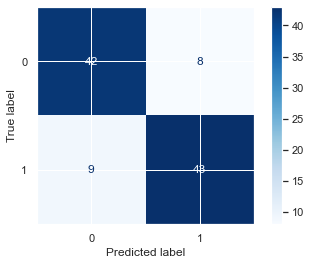

In [75]:
from sklearn.metrics import plot_confusion_matrix as pcm
pcm(rf,x_test,y_test,cmap=plt.cm.Blues)                # confusion matrix for DT
plt.show()

In [45]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.84      0.83      0.83        52

    accuracy                           0.83       102
   macro avg       0.83      0.83      0.83       102
weighted avg       0.83      0.83      0.83       102



In [69]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.8333173123137556